##Άσκηση 1

w=1

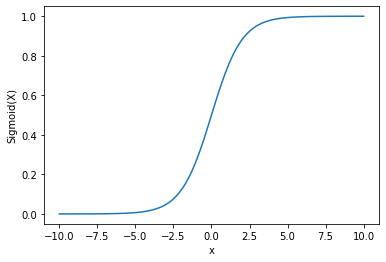

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
w = 1
z = 1/(1 + np.exp(-w*x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

w=5


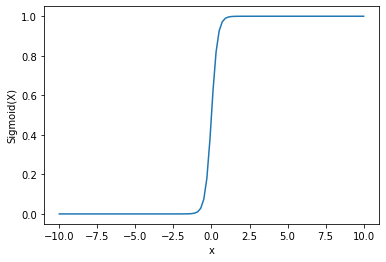

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
w = 5
z = 1/(1 + np.exp(-w*x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

w=100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


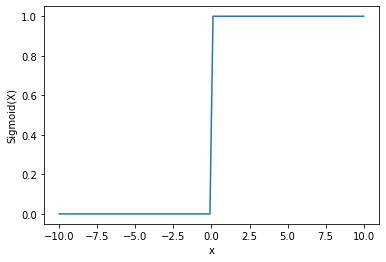

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

x = np.linspace(-10, 10, 100)
w = 100
z = 1/(1 + np.exp(-w*x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

Όσο μεγαλώνει η διάσταση των δεδομένων, χρειαζόμαστε εκθετικό στη
διάσταση των δεδομένων πλήθος δεδομένων έτσι ώστε να υπάρχουν εγγυήσεις
γενίκευσης. Μεγαλύτερη διάσταση δεδομένων συνεπάγεται μεγαλύτερος χώρος μνήμης και περισσότερος χρόνος για την επεξεργασία τους. Μοντέλα μεγάλης χωρητικότητας μπορεί να απομνημονεύσουν ιδιότητες και χαρακτηριστικά
του συνόλου εκπαίδευσης τα οποία δεν παρουσιάζονται στο σύνολο ελέγχου (overfitting).

Η κανονικοποίηση της παραμέτρου w θα βοηθούσε στην αντιμετώπιση του overfitting.
Χρειαζόμαστε ένα μοντέλο που προσπαθεί να κάνει fit τα training data χωρίς να χρησιμοποιεί βάρη w με πολύ μεγάλες τιμές. Για αυτό θα χρησιμοποιούσα την L1 κανονικοποίηση η οποία προσπαθεί να κρατήσει τις απόλυτες τιμές των w όσο το δυνατόν πιο χαμηλές.

#Άσκηση 2


Έχουμε: $ β^{*} = argmin_{β}∑_{i=1}^{N}(y - Xβ)_{2}^{2} + λ ∑_{k=1}^{K} β_{k}^{2} $ , εκφρασμένο ως πρόβλημα ελαχιστοποίησης
ευκλείδειων αποστάσεων:
$$
β^{*} = argmin_{β}||y - Xβ||_{2}^{2} + λ||β||_{2}^{2}
$$
με $Χ \in R^{n×m} $, $y \in R^{n × 1}$ και $β \in R^{m}$. \\

$$f(β) = (y^Τ - β^ΤΧ^Τ)(y^Τ - β^ΤΧ^Τ)^Τ + λβ^Τβ\\\\
= (y^Τ - β^ΤΧ^Τ)(y - βΧ) + λβ^Τβ\\\\
= y^Ty - y^TβΧ - β^ΤΧ^Τy + β^ΤΧ^ΤβΧ + λβ^Τβ\\\\$$

Παρατηρούμε ότι το $β^ΤΧ^Τy$ είναι το transpose του $y^TβΧ$. Άρα: \\
$$f(β) = y^Ty - 2β^ΤΧ^Τy + β^ΤΧ^ΤβΧ + λβ^Τβ$$ \\
Ψάχνουμε το ελάχιστο της συνάρτησης. Άρα θα βρούμε το που μηδενίζεται η παράγωγός της. Έχουμε:
$$
\frac{\partial f(β)}{\partial β} = \frac{\partial{(y^Ty - 2β^ΤΧ^Τy + β^ΤΧ^ΤβΧ + λβ^Τβ)}}{\partial β} = 0 ⇒\\
-2X^Ty + 2X^TXβ + 2λβ = 0 \Rightarrow\\
X^Ty = X^TXβ + λβ \Rightarrow\\
X^Ty = β(X^TX + λ) \Rightarrow\\
β = \frac{X^Ty}{(X^TX + λ)} \Rightarrow\\
β = X^Ty(X^TX + λ)^{-1}
$$

Έχουμε $X^TX ≥ 0$ και για $λ > 0 ⇒ (X^TX + λ) > 0$ και αντιστρέψιμο, επομένως έχει μοναδική λύση.

#Άσκηση 3


##Ερώτημα 1-2

In [ ]:
import os
import re
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn import metrics

path = "/content/drive/MyDrive/faces/*.png"
set_number = "Set_1"

# dictionary that shows first number of image for every set
dict_start = { "Set_1": 1,
                "Set_2": 8,
                "Set_3": 20,
                "Set_4": 32,
                "Set_5": 46 }

# dictionary that shows last number of image for every set
dict_end = { "Set_1": 7,
              "Set_2": 19,
              "Set_3": 31,
              "Set_4": 45,
              "Set_5": 64 }

def loadImages(path, set_number):
  cv_img = []
  person_list = []
  for img in glob.glob(path):
    # get image name
    name = os.path.basename(img)

    # extract person number and image number from filename
    res = re.findall("\d+", name)

    # image number
    its = int(res[1])

    # person number
    person = int(res[0])

    # if we are in range of given set we add to lists
    if its >= dict_start[set_number] and its <= dict_end[set_number]:
      # get image
      image = Image.open(img, 'r')

      # get dimensions for RGB array
      img_1d_vector = list(image.getdata())
      cv_img.append(img_1d_vector)

      # add person to list
      person_list.append(person)


  return cv_img, person_list

def eigenFaces(n_components, set_number):
  X_train, Y_train = loadImages(path, "Set_1")
  X_test, Y_test = loadImages(path, set_number)

  pca = PCA(n_components, whiten=True).fit(X_train) # pca for n components

  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, Y_train)

  print(set_number,": ", knn.score(X_test_pca, Y_test))

print("d = 9 ")
d = 9
eigenFaces(d, "Set_1")
eigenFaces(d, "Set_2")
eigenFaces(d, "Set_3")
eigenFaces(d, "Set_4")
eigenFaces(d, "Set_5")

print()

print("d = 30 ")
d = 30
eigenFaces(d, "Set_1")
eigenFaces(d, "Set_2")
eigenFaces(d, "Set_3")
eigenFaces(d, "Set_4")
eigenFaces(d, "Set_5")

d = 9 
Set_1 :  1.0
Set_2 :  0.95
Set_3 :  0.6166666666666667
Set_4 :  0.22857142857142856
Set_5 :  0.11052631578947368

d = 30 
Set_1 :  1.0
Set_2 :  0.9666666666666667
Set_3 :  0.95
Set_4 :  0.6928571428571428
Set_5 :  0.23684210526315788


##Ερώτημα 3

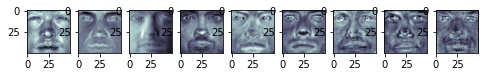

In [ ]:
def printeigenFaces(n_components, set_number):
  X_train, Y_train = loadImages(path, "Set_1")
  X_test, Y_test = loadImages(path, set_number)

  pca = PCA(n_components, whiten=True).fit(X_train) # pca for n components

  # Printing eigenfaces
  plt.figure(figsize=(9, 4))
  for i in range(0,n_components,1):
    plt.subplot(3, 10, i+1)
    plt.imshow(pca.components_[i].reshape(50, 50), cmap='bone')

  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, Y_train)

d = 9
printeigenFaces(d, "Set_1")

##Ερώτημα 4

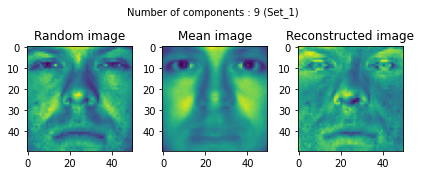

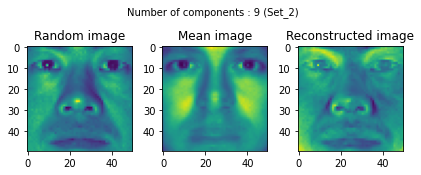

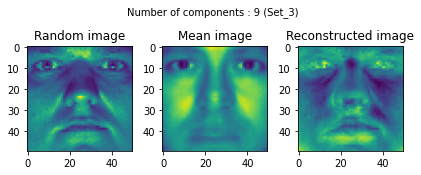

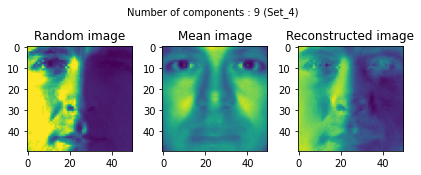

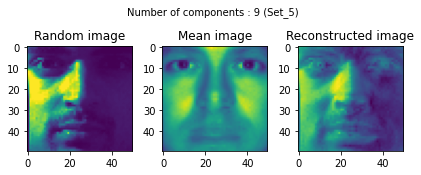

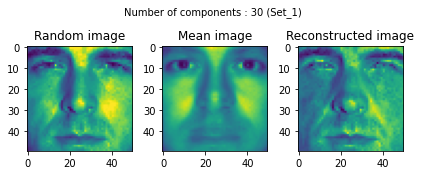

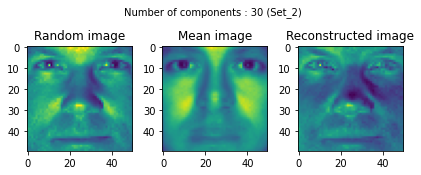

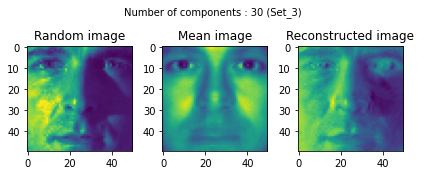

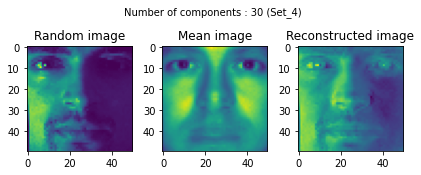

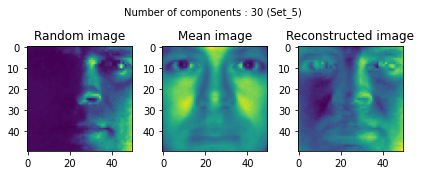

In [ ]:
from numpy.random.mtrand import random_integers
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from random import seed
from random import randint

def faceReconstruct(n_components, set_number):
  # Get images from set 1
  X, Y = loadImages(path, "Set_1")

  # Get a random image from given set - This will be the image we want to reconstruct
  X_random, Y_random = loadImages(path, set_number)
  random_image = X_random[randint(0,len(X_random)-1)]

  # Print random image
  fig, j = plt.subplots(1,3, figsize=(6,6))
  j[0].imshow(np.array(random_image).reshape(50,50))
  j[0].set_title("Random image")

  pca = PCA(n_components, whiten=True).fit(X)

  X_pca = pca.transform(X)

  knn = KNeighborsClassifier(n_neighbors=1).fit(X_pca, Y)

  # Get mean face
  mean_face = pca.mean_.reshape(50,50)

  # Print mean face
  j[1].imshow(mean_face.reshape(50,50))
  j[1].set_title("Mean image")

  # Reshape mean face to one long vector and substract it from image
  random_image = random_image - mean_face.flatten()

  # Reconstruct image
  for i in range(0,n_components):
    # The weight is the dot product of the mean subtracted image
    #vector with the eigenvector
    weight = np.dot(random_image, pca.components_[i])
    random_image = random_image + weight * pca.components_[i]

  j[2].imshow(random_image.reshape(50,50))
  j[2].set_title("Reconstructed image")

  plt.suptitle("Number of components : " + str(n_components) + " (" + set_number + ")", y = 0.7, fontsize=10)
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.show()

d = 9
faceReconstruct(d, "Set_1")
faceReconstruct(d, "Set_2")
faceReconstruct(d, "Set_3")
faceReconstruct(d, "Set_4")
faceReconstruct(d, "Set_5")

d = 30
faceReconstruct(d, "Set_1")
faceReconstruct(d, "Set_2")
faceReconstruct(d, "Set_3")
faceReconstruct(d, "Set_4")
faceReconstruct(d, "Set_5")

##Ερώτημα 5

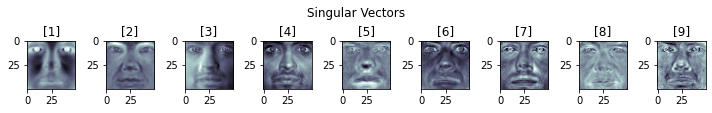

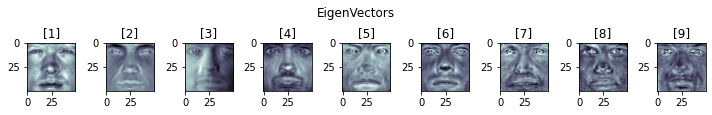

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD

X, Y = loadImages(path, "Set_1")

# Perform SVD on data set_1 and get the 9 main singular_vectors
U, s, V = np.linalg.svd(X)
singular_vectors = []
for i in range (0,9):
  singular_vectors.append(V[i])

pca = PCA(n_components=9, whiten=True).fit(X)

X_pca = pca.transform(X)

# Print eigenvectors and singular_vectors for comparison
plt.figure(figsize=(10,8))
for i in range (0,9):
  plt.subplot(1,9, i+1)
  plt.imshow(singular_vectors[i].reshape(50,50), cmap='bone')
  plt.title("[" + str(i+1) + "]")
plt.suptitle("Singular Vectors", y = 0.6)
plt.tight_layout()

plt.figure(figsize=(10,8))
for i in range (0,9):
  plt.subplot(2, 9, i+1)
  plt.imshow(pca.components_[i].reshape(50,50), cmap='bone')
  plt.title("[" + str(i+1) + "]")
plt.suptitle("EigenVectors", y = 0.825)
plt.tight_layout()


Παρατηρούμε ότι οι εικόνες είναι παρόμοιες αλλά όχι ίδιες (τουλάχιστον όχι όλες). Αυτό οφείλεται στο ότι δεν υπάρχει προεπεξεργασία των εικόνων.